download nltk_data folder from here : https://www.dropbox.com/sh/27t8ijq0elot8cw/AAAc8oe0d_mdtAhi3xk51ThEa?dl=0

# Example of Collecting Data from multiple files

download reuters_data from here : https://www.dropbox.com/sh/865xeu4xwbyo2yt/AACd0pQEbeOSfvNjiV7aur4Ka?dl=0

In [1]:
import numpy as np

In [2]:
import os
import pandas as pd
import nltk
path=r"/Users/lalitsachan/Dropbox/0.0 Data/reuters_data/"

files=os.listdir(path)

In [4]:
# files

In [8]:
f=open(path+'training_money-fx_3593.txt','r',encoding='latin-1')

text=""
for line in f:
    if line.strip()=="":continue
    text+=' '+line.strip()
    
f.close()

In [9]:
text

' HUNGARY HOPES DEVALUATION WILL END TRADE DEFICIT National Bank of Hungary first vice-president Janos Fekete said he hoped a planned eight pct devaluation of the forint will spur exports and redress last year\'s severe trade deficit with the West. Fekete told Reuters in an interview Hungary must achieve at least equilibrium on its hard currency trade. "It is useful to have a devaluation," he said. "There is now a real push to our exports and a bit of a curb to our imports." The official news agency MTI said today Hungary would devalue by eight pct and it expected the new rates to be announced later today. Fekete said the rates would come into effect tomorrow. He said one reason for the devaluation was that Hungary had a higher rate of inflation over the past two years than its main partners (around eight pct in 1985 and between five and 5.5 pct in 1986). This was partly an after-effect of action Hungary took to prevent inflation from soaring during the oil price shocks of the 1970s, h

In [10]:
f=open(path+'training_money-fx_3593.txt','r',encoding='latin-1')
temp=[line.strip() for line in f if line.strip()!=""]
f.close()

In [12]:
# temp

In [13]:
' '.join(temp)

'HUNGARY HOPES DEVALUATION WILL END TRADE DEFICIT National Bank of Hungary first vice-president Janos Fekete said he hoped a planned eight pct devaluation of the forint will spur exports and redress last year\'s severe trade deficit with the West. Fekete told Reuters in an interview Hungary must achieve at least equilibrium on its hard currency trade. "It is useful to have a devaluation," he said. "There is now a real push to our exports and a bit of a curb to our imports." The official news agency MTI said today Hungary would devalue by eight pct and it expected the new rates to be announced later today. Fekete said the rates would come into effect tomorrow. He said one reason for the devaluation was that Hungary had a higher rate of inflation over the past two years than its main partners (around eight pct in 1985 and between five and 5.5 pct in 1986). This was partly an after-effect of action Hungary took to prevent inflation from soaring during the oil price shocks of the 1970s, he

In [ ]:
# files

In [14]:
target=[]
article_text=[]

for file in files:
    
    if '.txt' not in file:continue
        
    f=open(path+file,encoding='latin-1')
    
    article_text.append(" ".join([line.strip() for line in
                                       f if line.strip()!=""]))
    if "crude" in file:
        target.append("crude")
    else:
        target.append("money")
    f.close()
    


In [15]:
mydata=pd.DataFrame({'target':target,'article_text':article_text})

In [16]:
mydata.head()

,target,article_text
0,money,JAPAN DOES NOT INTEND TO CUT DISCOUNT RATE-SUM...
1,money,ITALIAN 1987 GDP GROWTH FORECAST AT THREE PCT ...
2,crude,"IRAQ REPORTS ATTACKS ON SUPERTANKER, OIL TARGE..."
3,money,BANK OF SPAIN SUSPENDS ASSISTANCE The Bank of ...
4,money,"AFTER G-6, ROUND ONE GOES TO CENTRAL BANKS Cen..."


# Text Data Exploration with word cloud

In [17]:
from wordcloud import WordCloud

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
all_articles=' '.join(mydata['article_text'])

In [20]:
crude_articles=" ".join(mydata.loc[mydata['target']=='crude','article_text'])

In [21]:
money_articles=" ".join(mydata.loc[mydata['target']=='money','article_text'])

(-0.5, 399.5, 199.5, -0.5)

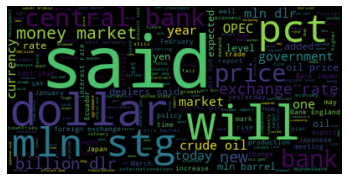

In [22]:
wordcloud = WordCloud().generate(all_articles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

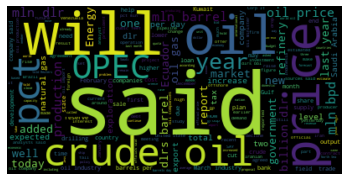

In [23]:
wordcloud = WordCloud().generate(crude_articles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

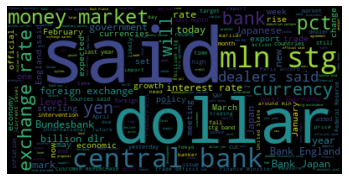

In [24]:
wordcloud = WordCloud().generate(money_articles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Text Data Exploration with nltk

In [ ]:
from nltk import word_tokenize

In [ ]:
# word_tokenize('how do i use nltk. what a good package it is! lets work with it')

In [ ]:
tokens=word_tokenize(money_articles)

In [ ]:
money_articles_Text=nltk.Text(tokens)

In [ ]:
money_articles_Text.concordance('dlr')

In [ ]:
money_articles_Text.similar('bank')

In [ ]:
money_articles_Text.common_contexts(['bank','currencies'])

# Text Data features with tfidf 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer  

In [26]:
from nltk.stem.wordnet import WordNetLemmatizer


In [27]:
lemma=WordNetLemmatizer()

In [29]:
lemma.lemmatize('leaves')

'leaf'

In [30]:
# from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

In [31]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [32]:
from nltk.tokenize import word_tokenize

lemma = WordNetLemmatizer()

my_stop=set(stopwords.words('english')+list(punctuation))

In [33]:
print(my_stop)

{'than', 'at', 'who', 'its', 'just', 'didn', 'a', 'being', 'same', "didn't", 'only', '^', 'again', 'having', 'and', 'his', 'below', "isn't", '\\', '=', 'why', 'has', "you'll", 'then', 'had', '*', 'she', "haven't", 'most', 'be', 'after', 'here', '|', 'ourselves', 'themselves', 'do', '-', 'few', "hadn't", '$', '/', 'should', 'doing', 're', 'hadn', 'ain', '[', 'but', 'y', 'doesn', 'myself', 'needn', "doesn't", 'will', 'once', 've', 'they', '(', 'yours', '.', 'me', 'over', 'won', "you've", 'into', 'the', 'm', 'mustn', 'for', 'during', '@', 'have', 'so', 'no', "shouldn't", 'while', 'shouldn', 'hasn', 'is', 'wouldn', 'to', 'll', "wouldn't", 'where', 'yourself', 'this', ';', '}', 'up', "'", "it's", 'under', 'did', 'too', 'of', 'i', 'isn', 'her', 'haven', 'their', 'ma', 'theirs', 'weren', '<', "don't", 'wasn', "won't", 'from', 'out', 'other', '"', 'your', 'those', 'against', 'both', 'herself', 'which', "you're", 'don', 'before', "should've", '{', 'himself', 'in', '%', 'yourselves', 'can', 'the

In [35]:
msg=mydata['article_text'][0]

In [38]:
msg

'japan does not intend to cut discount rate-sumita bank of japan governor satoshi sumita said the central bank has no intention of cutting its discount rate again as a way of preventing the yen\'s rise. he told a press conference that the growth of japanese money supply remains high. the bank will have to watch closely various developments resulting from its already eased monetary stance, such as the sharp rise in real estate and stock prices, he said. although the yen\'s rise will have a greater deflationary impact on the economy, the economy is not likely to slow down much further, sumita said. "i don\'t think we should change our economic outlook at the moment," sumita said. sumita has said in the past that he expects the economy to show a gradual upturn in the second half of the year. the governor said the six major industrial nations are expected to review last month\'s pact on currency stability when they meet next in april. dealers said they expect the six - britain, canada, fra

In [46]:
def split_into_lemmas(message):
    
    message=message.lower()
    
    words = word_tokenize(message)
    
    words_sans_stop=[]
    
    for word in words :
        if word in my_stop:continue
        words_sans_stop.append(word)
        
    return [lemma.lemmatize(word) for word in words_sans_stop]



In [47]:
tfidf= CountVectorizer(analyzer=split_into_lemmas,
                       min_df=20,
                       max_df=500,
                       stop_words=my_stop)

# TfidfVectorizer(analyzer='word',
#                        min_df=20,
#                        max_df=500,
#                        stop_words='english')

In [48]:
tfidf.fit(mydata['article_text'])

CountVectorizer(analyzer=<function split_into_lemmas at 0x7fabc91fc840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=500,
        max_features=None, min_df=20, ngram_range=(1, 1),
        preprocessor=None,
        stop_words={'than', 'at', 'who', 'its', 'just', 'didn', 'a', 'being', 'same', "didn't", 'only', '^', 'again', 'having', 'and', 'his', 'below', "isn't", '\\', '=', 'why', 'has', "you'll", 'then', 'had', '*', 'she', "haven't", 'most', 'be', 'after', 'here', '|', 'ourselves', 'themselves', 'do', '-', '...urs', 'between', "needn't", ')', '&', 'by', 'now', 'shan', 'we', 'until', 'or', '`', 'd', 'through'},
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [49]:
tfidf_data=tfidf.transform(mydata['article_text'])

In [50]:
tfidf_data.shape

(927, 795)

In [51]:
tfidf_data

<927x795 sparse matrix of type '<class 'numpy.int64'>'
	with 46952 stored elements in Compressed Sparse Row format>

In [52]:
text_feat=pd.DataFrame(data=tfidf_data.toarray(),
                       columns=tfidf.get_feature_names())

In [53]:
text_feat

,'',--,...,1,1.5,10,100,11,12,15,...,world,worth,would,year,yen,yesterday,yet,yield,york,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,8,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,7,2,0,0,0,0,0,0,0,0,...,1,0,0,1,8,3,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,2,0,0,0,0,0,0,0,0,...,2,0,1,2,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,1,...,0,0,2,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
mydata['target']=(mydata['target']=='money').astype(int)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
text_feat.shape

(927, 795)

In [57]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [58]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [50,100,150,200,300,400,600,700],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [59]:
clf = RandomForestClassifier()

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
# run randomized search
n_iter_search = 10
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   cv=10,
                                  n_jobs=-1,verbose=20)


In [62]:
random_search.fit(tfidf_data,mydata['target'])

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_features': [50, 100, 150, 200, 300, 400, 600, 700], 'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=Tru

In [63]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.99981 (std: 0.00026)
Parameters: {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 50, 'max_depth': 50, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.99971 (std: 0.00042)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 50, 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.99967 (std: 0.00036)
Parameters: {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 50, 'max_depth': 30, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.99957 (std: 0.00046)
Parameters: {'n_estimators': 700, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 50, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}

